In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fnames = ["outputs/alpha_search_%.2f-%.2f.csv"%(i, i + 0.01 * 4) for i in [0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31]]
fnames

['outputs/alpha_search_0.01-0.05.csv',
 'outputs/alpha_search_0.06-0.10.csv',
 'outputs/alpha_search_0.11-0.15.csv',
 'outputs/alpha_search_0.16-0.20.csv',
 'outputs/alpha_search_0.21-0.25.csv',
 'outputs/alpha_search_0.26-0.30.csv',
 'outputs/alpha_search_0.31-0.35.csv']

In [3]:
df = pd.read_csv(fnames[0])
for fname in fnames[1:]:
    df = df.append(pd.read_csv(fname))

In [4]:
df.head()

,alpha,avg_traffic,success_prob
0,0.01,10026.75,92.0
1,0.02,8613.53,98.0
2,0.03,6283.80,93.0
3,0.04,4633.27,95.0
4,0.05,3461.50,88.0


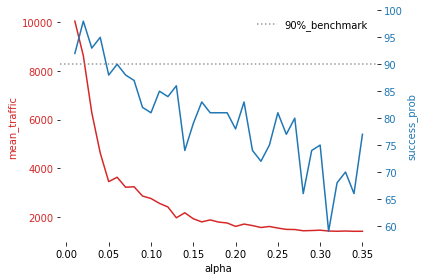

In [5]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(df.alpha, df.avg_traffic, color=color)
ax1.set_xlabel('alpha')
ax1.set_ylabel('mean_traffic', color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = plt.twinx()
ax2.axhline(y=90, color='grey', alpha=0.8, linestyle=":")
ax2.plot(df.alpha, df.success_prob, color=color)
ax2.set_ylabel('success_prob', color=color)
ax2.legend(['90%_benchmark'], frameon=False)
ax2.tick_params(axis='y', labelcolor=color)

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

plt.tight_layout()
plt.savefig('outputs/alpha_search_summary.png')